In [1]:
import os

!pip install kaggle
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs --force
!unzip -oq "cuhk-face-sketch-database-cufs.zip"

def list_files_in_folder(folder_path):
  """Lists all files in a given folder."""
  try:
    file_list = os.listdir(folder_path)
    return file_list
  except FileNotFoundError:
    print(f"Error: Folder not found at {folder_path}")
    return []

photos_folder = "photos"
files_in_photos = list_files_in_folder(photos_folder)

Dataset URL: https://www.kaggle.com/datasets/arbazkhan971/cuhk-face-sketch-database-cufs
License(s): copyright-authors
 94% 106M/113M [00:02<00:00, 53.3MB/s] 
100% 113M/113M [00:02<00:00, 47.3MB/s]


In [2]:
print(files_in_photos)
print(len(files_in_photos))

['f-020-01.jpg', 'f-016-01.jpg', 'm1-021-01.jpg', 'm-021-01.jpg', 'm-009-01.jpg', 'm-045-01.jpg', 'm-074-01.jpg', 'm-076-01.jpg', 'f1-011-01.jpg', 'm1-022-01.jpg', 'f1-009-01.jpg', 'f-017-01.jpg', 'm-055-01.jpg', 'm-031-01.jpg', 'm-093-01.jpg', 'm-037-01.jpg', 'f-007-01.jpg', 'm-094-01.jpg', 'm1-011-01.jpg', 'f1-013-01.jpg', 'm-044-01.jpg', 'f-015-01.jpg', 'm-081-01.jpg', 'f-022-01.jpg', 'm-090-01.jpg', 'm1-014-01.jpg', 'f-032-01.jpg', 'm-030-01.jpg', 'm1-002-01.jpg', 'm-026-01.jpg', 'f1-014-01.jpg', 'f-012-01.jpg', 'f-010-01.jpg', 'm-028-01.jpg', 'm-010-01.jpg', 'f1-008-01.jpg', 'm-100-01.jpg', 'm-099-01.jpg', 'f-034-01.jpg', 'm1-007-01.jpg', 'm-068-01.jpg', 'm-018-01.jpg', 'm1-005-01.jpg', 'm1-027-01.jpg', 'm1-018-01.jpg', 'm1-033-01.jpg', 'm-082-01.jpg', 'm-096-01.jpg', 'm1-031-01.jpg', 'm-058-01.jpg', 'f-027-01.jpg', 'm1-006-01.jpg', 'm-095-01.jpg', 'f-026-01.jpg', 'f-037-01.jpg', 'm-069-01.jpg', 'm-091-01.jpg', 'm-036-01.jpg', 'm-089-01.jpg', 'm1-034-01.jpg', 'f-011-01.jpg', 'm1-0

Começo do trabalho

Importando bibliotecas

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import shutil
import tensorflow as tf
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import seaborn as sns


Testando a existência das imagens

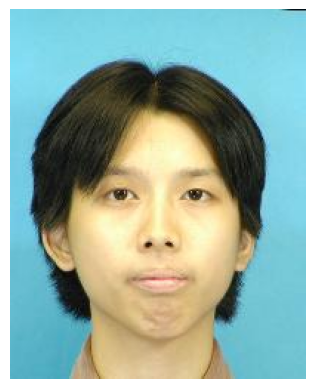

In [30]:
img_teste = mpimg.imread("photos/f-007-01.jpg")
plt.imshow(img_teste)
plt.axis('off')
plt.show()

Criando pastas

In [5]:
pasta_imagens_sem_redimensionar = photos_folder
pasta_masculino = "photos_redimensionadas_rotuladas/Masculino"
pasta_feminino = "photos_redimensionadas_rotuladas/Feminino"
pasta_imagens_redimensionadas = 'photos_redimensionadas'
os.makedirs(pasta_imagens_redimensionadas, exist_ok=True)
os.makedirs(pasta_masculino, exist_ok=True)
os.makedirs(pasta_feminino, exist_ok=True)


Redimensionando imagens

Tamanho

In [27]:
tamanho = (250,200)

Função de iteração nas imagens

In [28]:
def iterar_pasta(pasta_original, extensoes=('jpg'), funcao=None):

    if not os.path.isdir(pasta_original):
        raise ValueError(f"{pasta_original} não é um diretório válido.")

    for arquivo in os.listdir(pasta_original):
        if arquivo.endswith(extensoes):  # Verifica se o arquivo tem extensão válida
            caminho_origem = os.path.join(pasta_original, arquivo)
            if funcao:
                funcao(caminho_origem)  # Aplica a função ao caminho do arquivo

Iterando nas imagens com novas dimensões. Criando uma pasta chamada pasta_imagens_redimensionadas

In [29]:

def redimensionar_e_salvar(caminho_origem):
    try:
        # Abrir a imagem
            img = Image.open(caminho_origem)


            # Redimensionar a imagem
            img_redimensionada = img.resize(tamanho)
            print(img_redimensionada.size)

            # Obter o nome do arquivo
            nome_arquivo = os.path.basename(caminho_origem)

            # Salvar a imagem redimensionada na pasta de saída
            caminho_saida = os.path.join(pasta_imagens_redimensionadas, nome_arquivo)
            img_redimensionada.save(caminho_saida)

            print(f'{nome_arquivo} redimensionada e salva em {caminho_saida}')

    except Exception as e:
        print(f'Erro ao processar {nome_arquivo}: {e}')

iterar_pasta(pasta_imagens_sem_redimensionar, funcao=redimensionar_e_salvar)


(250, 200)
f-020-01.jpg redimensionada e salva em photos_redimensionadas/f-020-01.jpg
(250, 200)
f-016-01.jpg redimensionada e salva em photos_redimensionadas/f-016-01.jpg
(250, 200)
m1-021-01.jpg redimensionada e salva em photos_redimensionadas/m1-021-01.jpg
(250, 200)
m-021-01.jpg redimensionada e salva em photos_redimensionadas/m-021-01.jpg
(250, 200)
m-009-01.jpg redimensionada e salva em photos_redimensionadas/m-009-01.jpg
(250, 200)
m-045-01.jpg redimensionada e salva em photos_redimensionadas/m-045-01.jpg
(250, 200)
m-074-01.jpg redimensionada e salva em photos_redimensionadas/m-074-01.jpg
(250, 200)
m-076-01.jpg redimensionada e salva em photos_redimensionadas/m-076-01.jpg
(250, 200)
f1-011-01.jpg redimensionada e salva em photos_redimensionadas/f1-011-01.jpg
(250, 200)
m1-022-01.jpg redimensionada e salva em photos_redimensionadas/m1-022-01.jpg
(250, 200)
f1-009-01.jpg redimensionada e salva em photos_redimensionadas/f1-009-01.jpg
(250, 200)
f-017-01.jpg redimensionada e salva

Criar pastas separadas para as categorias Masculino e Feminino para fazer uso do `image_dataset_from_directory` no keras. Observou-se que os arquivos possuem prefixos com f para Feminino e m para Masculino, assim foi feito o uso de uma função para mover os arquivos de acordo com o prefixo.




In [31]:

def mover_arquivo(caminho_arquivo):
    nome_arquivo = os.path.basename(caminho_arquivo)
    if nome_arquivo[0].lower() == 'm':  # Masculino
        destino = os.path.join(pasta_masculino, nome_arquivo)
    elif nome_arquivo[0].lower() == 'f':  # Feminino
        destino = os.path.join(pasta_feminino, nome_arquivo)
    else:
        print(f"Ignorando arquivo: {caminho_arquivo}")
        return
    shutil.copy2(caminho_arquivo, destino)

iterar_pasta(pasta_imagens_redimensionadas, funcao=mover_arquivo)

Separando os dados 50% para o conjunto de treinamento, 30% para o conjunto de validação, e 20% para o conjunto de teste: reservado para avaliar o desempenho final do modelo. Aqui também definimos um batch_size de 32 para usar um lote de tamanho médio (na expectativa que o hardware se comporte bem).

In [32]:

caminho_dataset = "photos_redimensionadas_rotuladas/"
tamanho_imagem = tamanho  # Usar a tupla de tamanho definida anteriormente
batch_size = 32
seed = 23
percentual_treino = 0.5 # 50% pra treino
percentual_validacao = 0.3 # 30% pra validação conforme os requisitos do trabalho
color_mode = "rgb"

Data Augmentation

In [11]:
# Função para Data Augmentation
def aplicar_data_augmentation():
    """
    Aplica diversas transformações de Data Augmentation para aumentar a diversidade do conjunto de dados:
    - Flip horizontal
    - Pequenas rotações
    - Zoom aleatório
    - Translação horizontal e vertical
    - Ajustes de brilho e contraste
    """
    return tf.keras.Sequential([
        tf.keras.layers.RandomFlip("horizontal"),        # Flip horizontal
        tf.keras.layers.RandomRotation(0.1),            # Rotação até 10%
        tf.keras.layers.RandomZoom(0.2),                # Zoom aleatório até 20%
        tf.keras.layers.RandomTranslation(0.1, 0.1),    # Translação de até 10%
        tf.keras.layers.RandomBrightness(factor=0.2),   # Ajuste de brilho até 20%
        tf.keras.layers.RandomContrast(factor=0.2)      # Ajuste de contraste até 20%
    ])

Função de carregamento do dataset: Deixamos em uma função pois se quer automatizar esse carregamento de dataset (inclusive poderia usar diferentes combinações de treinamento, teste e validação).

In [33]:
def carregar_dataset():
    dataset = tf.keras.utils.image_dataset_from_directory(
        caminho_dataset,
        labels="inferred",
        label_mode="int",
        color_mode=color_mode,
        image_size=tamanho_imagem,
        batch_size=batch_size,
        shuffle=True,
        seed=seed
    )

    tamanho_total = tf.data.experimental.cardinality(dataset).numpy()
    tamanho_treino = int(percentual_treino * tamanho_total)
    tamanho_validacao = int(percentual_validacao * tamanho_total)

    dataset_treino = dataset.take(tamanho_treino)
    dataset_resto = dataset.skip(tamanho_treino) #Pegando o resto
    dataset_validacao = dataset_resto.take(tamanho_validacao)
    dataset_teste = dataset_resto.skip(tamanho_validacao) #pegando o resto para teste

    # Normalização
    def normalizar(imagem, rótulo):
        return tf.cast(imagem, tf.float32) / 255.0, rótulo

    # Aplicar normalização
    dataset_treino = dataset_treino.map(normalizar)
    #dataset_validacao = dataset_validacao.map(normalizar)
    #dataset_teste = dataset_teste.map(normalizar)

    # Aplicar Data Augmentation apenas no conjunto de treinamento
    data_augmentation = aplicar_data_augmentation()
    #dataset_treino = dataset_treino.map(lambda x, y: (data_augmentation(x), y))

    # Prefetch. Para garantir que os dados sejam lidos de forma assíncrona.
    # Paralelismmo :)
    return (
        dataset_treino.prefetch(buffer_size=tf.data.AUTOTUNE),
        dataset_validacao.prefetch(buffer_size=tf.data.AUTOTUNE),
        dataset_teste.prefetch(buffer_size=tf.data.AUTOTUNE)
    )

Calculando os pesos para compensar os desbalanceamento

In [13]:
# Função para calcular os pesos de classe
def calcular_pesos(dataset_treino):
    """
    Calcula os pesos de classe para lidar com desbalanceamento entre Masculino e Feminino.
    """
    y_treino = []
    # Iterar sobre o conjunto de treino e extrair os rótulos
    for _, rótulo in dataset_treino.unbatch():
        y_treino.append(rótulo.numpy())
    # Converter para um array NumPy
    y_treino = np.array(y_treino)
    # Calcular os pesos. O peso para cada classe é inversamente proporcional ao número de exemplos
    class_weights = compute_class_weight("balanced", classes=np.unique(y_treino), y=y_treino)
    # Converter para um dicionário. Onde a chave é o rótulo e o valor é o peso
    return dict(enumerate(class_weights))


Função de criar o modelo de rede

In [14]:
#num_camadas: Número de camadas convolucionais no modelo.
#filtros: Lista com o número de filtros para cada camada convolucional.
#ativacao: Lista com as funções de ativação para cada camada convolucional.
#dropout_rate: Taxa de dropout para evitar overfitting.
#regularizacao: Lista com os valores de regularização L2 para cada camada convolucional.
def criar_modelo(nome,num_camadas, filtros, ativacao, dropout_rate, regularizacao):
    # Criar o modelo e uma "sequência" de camadas
    modelo = tf.keras.Sequential()
    # Adicionar a primeira camada. Ou seja, a camada de entrada.
    modelo.add(tf.keras.layers.InputLayer(shape=(200, 250, 3))) #tamnho da imagem e quantidade de canais de cor(rgb)
    # Faz um loop para adicionar as camadas ocultas.
    # Para cada camada oculta, adicionar uma camada convolucional
    # e uma camada de pooling
    #
    for i in range(num_camadas):
        modelo.add(tf.keras.layers.Conv2D(
            filtros[i], (3, 3), #Kernel pequeno para capturar detalhes. Ideal para imagens pequenas
            activation=ativacao[i], #Função de ativação para capturar detalhes
            kernel_regularizer=tf.keras.regularizers.l2(regularizacao[i]) #Lista de regularização L2
        ))
        modelo.add(tf.keras.layers.MaxPooling2D((2, 2))) #Padrão para capturar detalhes
    modelo.add(tf.keras.layers.Flatten()) #Flatten para transformar as imagens em vetores
    modelo.add(tf.keras.layers.Dropout(dropout_rate)) # Dropout para evitar overfitting. Ou nesse caso é pra testar os limites do overfitting
    modelo.add(tf.keras.layers.Dense(1, activation="sigmoid")) # Camada de saída. Ou seja, a camada de classificação
    # Compilar o modelo. Definir o otimizador, a função de perda e as métricas
    # Adam é um otimizador popular. Usa momentum e RMSprop. Usam gradientes descendentes para minimizar a função de perda
    # Binary crossentropy eh a funcao de perda para classificacao binaria.
    #usando como metrica a acuracia inicialmente
    modelo.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    return modelo

Função de avaliação do modelo

In [15]:
# Função para avaliar o modelo
def avaliar_modelo(modelo, dataset_teste, y_teste):
    # y_pred representa as previsões do modelo
    # modelo.predict retorna um array com as previsões. Probabilidade
    #Se for maior que 0.5, classifica de um jeito e menor que 0.5, classifica de outro jeito :)
    #Lembrando que a classficação foi inferida
    y_pred = (modelo.predict(dataset_teste) > 0.5).astype("int32")
    #y_pred_probs representa as previsões do modelo. Ravel transforma o array 2D em 1D
    y_pred_probs = modelo.predict(dataset_teste).ravel()
    # F1 score. Pedido nos requisitos
    f1 = f1_score(y_teste, y_pred)
    # AUC. Pedido nos requisitos
    auc = roc_auc_score(y_teste, y_pred_probs)
    # Roc curve é uma curva de ROC. Pedido nos requisitos
    fpr, tpr, _ = roc_curve(y_teste, y_pred_probs)
    #Enfim, matriz de confusão. Ufa!
    cm = confusion_matrix(y_teste, y_pred)
    return y_pred, f1, auc, fpr, tpr, cm

Função de plotar a matriz de confusão. Quantos foram acertos e erros. Quantos foram confundidos.

In [16]:
def plotar_matriz_confusao(cm, combinacao):
    """
    Plota a matriz de confusão com os rótulos ajustados (0 = Masculino, 1 = Feminino).
    """
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Masculino", "Feminino"],
                yticklabels=["Masculino", "Feminino"])
    plt.xlabel("Classe Predita")
    plt.ylabel("Classe Verdadeira")
    plt.title(f"Matriz de Confusão - {combinacao}")
    plt.show()

Função de plotar a curva ROC. Relação dos acertos e erros: Como foi classificação de maneira certas um sexo em outro. Gráfico que mostra como o modelo equilibra sensibilidade (TPR) e especificidade (1 - FPR) ao variar o limiar de decisão

In [17]:
def plotar_roc(fpr, tpr, auc, combinacao):
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], "k--", label="Aleatório")
    plt.xlabel("Falso Positivo")
    plt.ylabel("Verdadeiro Positivo")
    plt.title(f"Curva ROC - {combinacao}")
    plt.legend()
    plt.show()

Função que plota F1-Score:
Relação entre Precisão, Recall e F1-Score

Se a Precisão for alta, mas o Recall for baixo:
O modelo identifica poucos positivos reais, mas quando classifica algo como positivo, geralmente está certo.
O F1-Score será moderado porque há desequilíbrio.

Se o Recall for alto, mas a Precisão for baixa:
O modelo identifica quase todos os positivos reais, mas comete muitos erros ao classificar negativos como positivos.
O F1-Score também será moderado.

Se Precisão e Recall forem altas:
O F1-Score será alto, indicando que o modelo está classificando corretamente a maioria dos casos positivos com poucos erros.

In [18]:
from math import comb
# F1 score. Ela mede a qualidade da classificação.
'''
Relação entre Precisão, Recall e F1-Score
Se a Precisão for alta, mas o Recall for baixo:
O modelo identifica poucos positivos reais, mas quando classifica algo como positivo, geralmente está certo.
O F1-Score será moderado porque há desequilíbrio.
Se o Recall for alto, mas a Precisão for baixa:
O modelo identifica quase todos os positivos reais, mas comete muitos erros ao classificar negativos como positivos.
O F1-Score também será moderado.
Se Precisão e Recall forem altas:
O F1-Score será alto, indicando que o modelo está classificando corretamente a maioria dos casos positivos com poucos erros.
'''
def plotar_f1_scores(resultados):
    combinacoes = [f"Combinação {i+1}: {resultado['combinação']['nome']}" for i, resultado in enumerate(resultados)]
    f1_scores = [r["f1_score"] for r in resultados]

    plt.figure(figsize=(10, 5))
    plt.bar(combinacoes, f1_scores, color="skyblue")
    plt.xlabel("Combinações")
    plt.ylabel("F1-Score")
    plt.title("Comparação de F1-Score por Combinação")
    plt.xticks(rotation=45)
    plt.show()

Função de plotar AUC-ROC.
nterpretação do Valor da AUC
AUC = 1.0:

Separação perfeita.
O modelo classifica todos os positivos e negativos corretamente, independentemente do limiar.
AUC = 0.9–0.99:

Excelente capacidade de separação.
Poucos erros na classificação das classes.
AUC = 0.7–0.89:

Bom desempenho.
O modelo é razoável para separar as classes, mas pode cometer erros.
AUC = 0.5:

Desempenho aleatório.
O modelo não consegue diferenciar entre as classes (curva ROC é uma linha diagonal).
AUC < 0.5:

Pior que aleatório.
O modelo está consistentemente classificando errado.

In [19]:
# AUC.

def plotar_auc(resultados):
    #exibir e nomes das combinacoes
    combinacoes = [f"Combinação {i+1}: {resultado['combinação']['nome']}" for i, resultado in enumerate(resultados)]
    aucs = [r["auc"] for r in resultados]

    plt.figure(figsize=(10, 5))
    plt.bar(combinacoes, aucs, color="orange")
    plt.xlabel("Combinações")
    plt.ylabel("AUC-ROC")
    plt.title("Comparação de AUC-ROC por Combinação")
    plt.xticks(rotation=45)
    plt.show()

Plotar imagens que não conseguiu

In [20]:


def carregar_caminhos_e_classes(pasta_base):
    """
    Carrega os caminhos das imagens e suas classes baseados na estrutura de pastas.

    Parâmetros:
        - pasta_base: Diretório base contendo as subpastas para cada classe.

    Retorno:
        - lista_caminhos: Lista de caminhos completos das imagens.
        - lista_classes: Lista de classes verdadeiras baseadas nos nomes das subpastas.
    """
    lista_caminhos = []
    lista_classes = []
    for classe in os.listdir(pasta_base):
        caminho_classe = os.path.join(pasta_base, classe)
        if os.path.isdir(caminho_classe):  # Apenas pastas
            for arquivo in os.listdir(caminho_classe):
                if arquivo.endswith((".jpg", ".png", ".jpeg")):  # Apenas imagens
                    lista_caminhos.append(os.path.join(caminho_classe, arquivo))
                    lista_classes.append(classe)  # Nome da pasta como classe
    return lista_caminhos, lista_classes
# Carregue os caminhos e classes verdadeiras
pasta_base = "photos_redimensionadas_rotuladas"
caminhos_imagens, classes_verdadeiras = carregar_caminhos_e_classes(pasta_base)

# Converter classes em valores numéricos se necessário
mapeamento_classes = {"Masculino": 0, "Feminino": 1}
classes_verdadeiras_num = [mapeamento_classes[classe] for classe in classes_verdadeiras]


In [21]:
def plotar_erros(y_teste, y_pred, caminhos_imagens, classes_verdadeiras, num_erros=5, intervalo=3):
    """
    Exibe imagens classificadas incorretamente sem repetição.

    Parâmetros:
        - y_teste: Rótulos verdadeiros inferidos das pastas.
        - y_pred: Predições feitas pelo modelo.
        - caminhos_imagens: Lista de caminhos das imagens originais.
        - classes_verdadeiras: Lista de classes verdadeiras inferidas das pastas.
        - num_erros: Número máximo de erros a serem exibidos.
        - intervalo: Tempo em segundos entre cada exibição.
    """
    # Encontrar os índices das imagens classificadas incorretamente
    erros_idx = np.where(y_teste != y_pred)[0]
    num_erros = min(num_erros, len(erros_idx))  # Limitar ao número de erros disponíveis

    exibidas = set()  # Usar um conjunto para evitar repetições

    for idx in erros_idx:
        if idx in exibidas:
            continue  # Ignorar imagens já exibidas

        exibidas.add(idx)

        try:
            # Obter o caminho da imagem e a classe verdadeira
            img_path = caminhos_imagens[idx]
            classe_verdadeira = classes_verdadeiras[idx]

            # Abrir e exibir a imagem
            img = Image.open(img_path)
            plt.figure(figsize=(4, 4))  # Tamanho ajustado
            plt.imshow(img)
            plt.title(f"Verdadeiro: {classe_verdadeira}, Predito: {int(y_pred[idx])}")
            plt.axis("off")
            plt.show()

            # Pausa automática
            plt.pause(intervalo)
            plt.close()

            # Parar após exibir o número máximo de erros
            if len(exibidas) >= num_erros:
                break
        except Exception as e:
            print(f"Erro ao carregar ou exibir a imagem {img_path}: {e}")


Automatizar as combinações. Recursos computacionais não são infinitos, mas como

In [22]:
combinacoes = [
    # Combinação simples
    # Configuração:
    # 2 camadas convolucionais com 32 e 64 filtros.
    # Ambas as camadas usam ReLU como função de ativação.
    # Taxa de dropout de 30%.
    # Regularização L2 com penalidade de 0.01 para ambas as camadas.
    {"nome": "Simples", "num_camadas": 2, "filtros": [32, 64], "ativacao": ["relu", "relu"], "dropout_rate": 0.3, "regularizacao": [0.01, 0.01]},

    # Combinação mais profunda com diferentes ativações
    # Configuração:
    # 3 camadas convolucionais com 32, 64 e 128 filtros.
    # ReLU é usada nas primeiras camadas, enquanto Tanh é usada na última camada.
    # Taxa de dropout de 40%.
    # Regularização L2 com penalidade de 0.01 em todas as camadas.
    {"nome": "Profunda com diferentes ativações", "num_camadas": 3, "filtros": [32, 64, 128], "ativacao": ["relu", "relu", "tanh"], "dropout_rate": 0.4, "regularizacao": [0.01, 0.01, 0.01]},

    # Rede com mais camadas e filtros maiores
    # Configuração:
    # 4 camadas convolucionais com 32, 64, 128 e 256 filtros.
    # Todas as camadas usam ReLU.
    # Taxa de dropout de 50%.
    # Regularização L2 reduzida para 0.001.
    {"nome": "Rede com mais camadas e filtros", "num_camadas": 4, "filtros": [32, 64, 128, 256], "ativacao": ["relu", "relu", "relu", "relu"], "dropout_rate": 0.5, "regularizacao": [0.001, 0.001, 0.001, 0.001]},

    # Funções de ativação mistas
    # Configuração:
    # 3 camadas convolucionais com 64, 128 e 256 filtros.
    # Funções de ativação diferentes: ReLU, Tanh, e Sigmoid.
    # Taxa de dropout de 30%.
    # Regularização L2 de 0.01 em todas as camadas.
    {"nome": "Funções de ativação mistas", "num_camadas": 3, "filtros": [64, 128, 256], "ativacao": ["relu", "tanh", "sigmoid"], "dropout_rate": 0.3, "regularizacao": [0.01, 0.01, 0.01]},

    # Dropout menor
    # Configuração:
    # 2 camadas convolucionais com 64 e 128 filtros.
    # Ambas as camadas usam ReLU.
    # Taxa de dropout reduzida para 20%.
    # Regularização L2 de 0.01 em ambas as camadas.
    {"nome": "Dropout menor", "num_camadas": 2, "filtros": [64, 128], "ativacao": ["relu", "relu"], "dropout_rate": 0.2, "regularizacao": [0.01, 0.01]},

    # Dropout maior e regularização menor
    # Configuração:
    # 3 camadas convolucionais com 32, 64 e 128 filtros.
    # Ambas as camadas usam ReLU.
    # Taxa de dropout de 60%.
    # Regularização L2 reduzida para 0.001.
    {"nome": "Dropout maior e regularização menor", "num_camadas": 3, "filtros": [32, 64, 128], "ativacao": ["relu", "relu", "relu"], "dropout_rate": 0.6, "regularizacao": [0.001, 0.001, 0.001]},

    # Rede rasa com menos filtros
    # Configuração:
    # 2 camadas convolucionais com 16 e 32 filtros.
    # Ambas as camadas usam ReLU.
    # Taxa de dropout de 30%.
    # Regularização L2 de 0.01 em ambas as camadas.
    {"nome": "Rede rasa com menos filtros", "num_camadas": 2, "filtros": [16, 32], "ativacao": ["relu", "relu"], "dropout_rate": 0.3, "regularizacao": [0.01, 0.01]}
]


In [23]:
# Automatizar variações
def testar_combinacoes():

    valores_epochs = [10,15]  # Adicionar valores de epochs para testar
    #Earthy Stopping: parar o treinamento se o val_loss parar de melhorar. Coloca um limite no uso de epócas
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=5, restore_best_weights=True
    )

    dataset_treino, dataset_validacao, dataset_teste = carregar_dataset()
    # Concatenar os batches para obter os rótulos. Agora temos um array de rótulos
    y_teste = np.array([r.numpy() for _, r in dataset_teste.unbatch()])


    resultados = []

    for i, combinacao in enumerate(combinacoes):
        print(f"Testando combinação {combinacao['nome']} - {i+1}/{len(combinacoes)}...")
        modelo = criar_modelo(**combinacao)
        class_weights = calcular_pesos(dataset_treino)

        for epochs in valores_epochs:
            print(f"Treinando o modelo com {epochs} epochs...")
            modelo.fit(
                dataset_treino,
                validation_data=dataset_validacao,
                epochs=epochs,
                #class_weight=class_weights,
                callbacks=[early_stopping],
                verbose=1
            )

            # Avaliação
            y_pred, f1, auc, fpr, tpr, cm = avaliar_modelo(modelo, dataset_teste, y_teste)
            resultados.append({
                "combinação": combinacao,
                "epochs": epochs,
                "f1_score": f1,
                "auc": auc,
                "fpr": fpr,
                "tpr": tpr,
                "cm": cm
            })
            plotar_roc(fpr, tpr, auc, f"Combinação {combinacao['nome']} {i+1} com {epochs} epochs")
            plotar_matriz_confusao(cm, f"Combinação {combinacao['nome']} {i+1} com {epochs} epochs")
            plotar_f1_scores(resultados)
            plotar_auc(resultados)

            # Erros
            plotar_erros(
                y_teste=np.array(classes_verdadeiras_num),
                y_pred=y_pred,
                caminhos_imagens=caminhos_imagens,
                classes_verdadeiras=classes_verdadeiras,
                num_erros=5,
                intervalo=1
            )

    return resultados

Rodando tudo e salvando os resultados

In [35]:
# Verificar o balanceamento de classes no conjunto de treinamento
dataset_treino, dataset_validacao, dataset_teste = carregar_dataset()
y_treino = [r.numpy() for _, r in dataset_treino.unbatch()]
print("Distribuição das classes no treino:", np.unique(y_treino, return_counts=True))


Found 188 files belonging to 2 classes.
Distribuição das classes no treino: (array([0, 1], dtype=int32), array([25, 71]))


Found 188 files belonging to 2 classes.
Testando combinação Simples - 1/7...
Treinando o modelo com 1 epochs...
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.4583 - loss: 1.6789 - val_accuracy: 0.8125 - val_loss: 101.0281
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 647ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


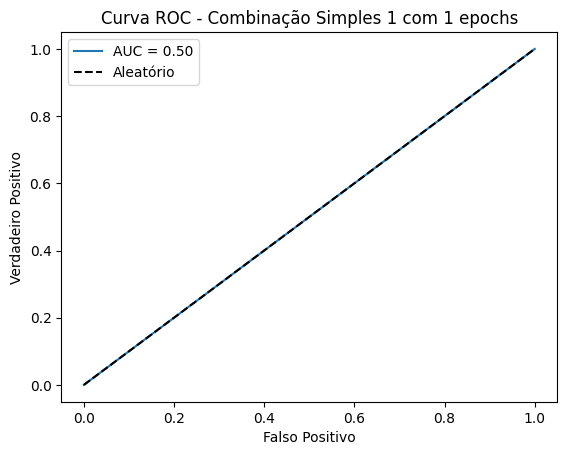

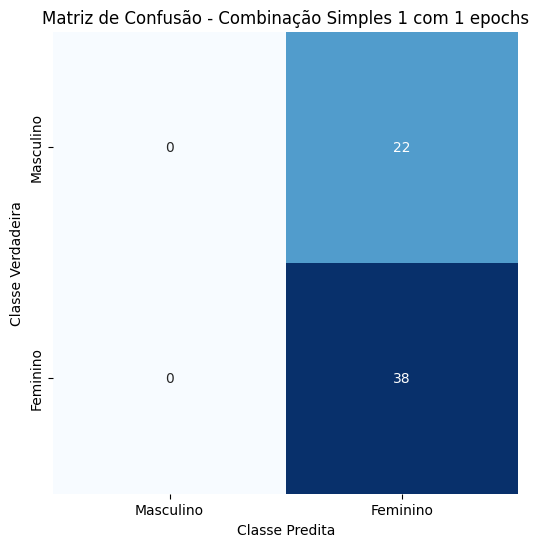

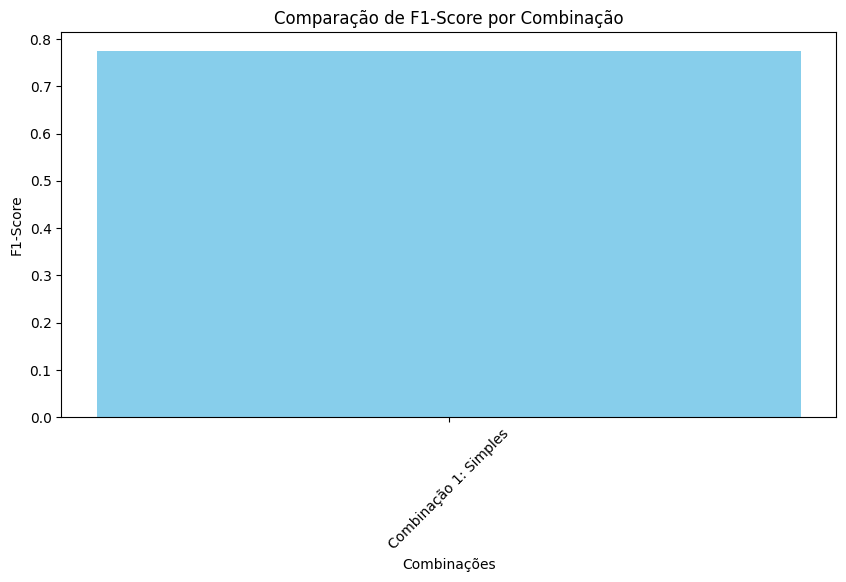

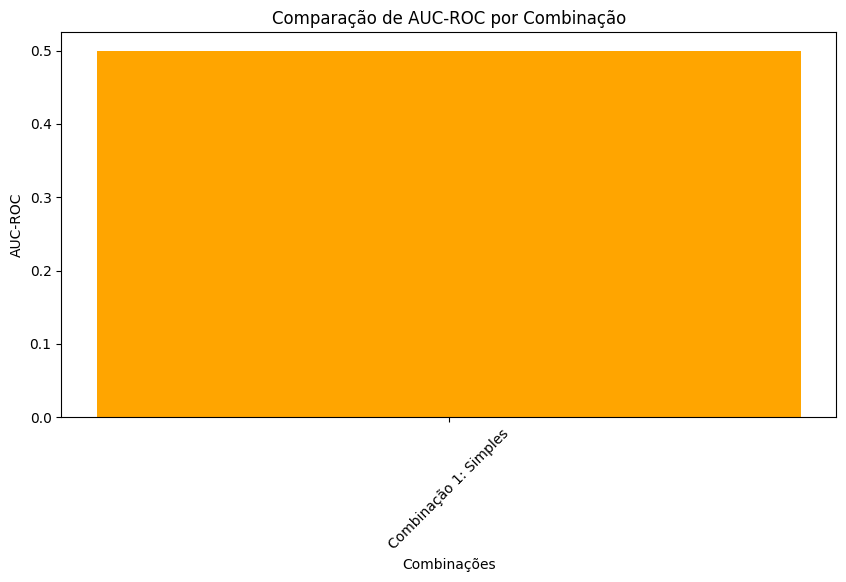

<ipython-input-21-c4681976a010>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Verdadeiro: {classe_verdadeira}, Predito: {int(y_pred[idx])}")


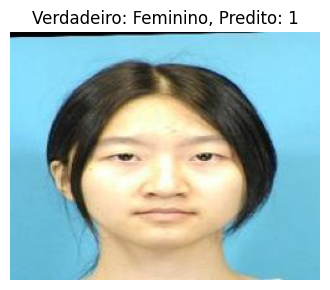

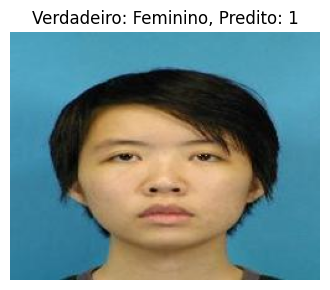

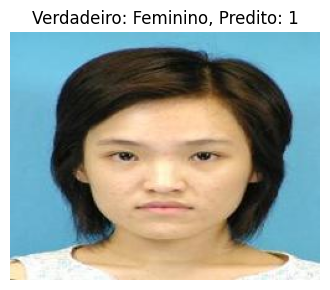

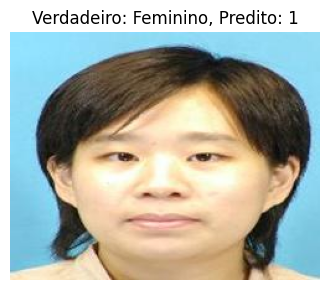

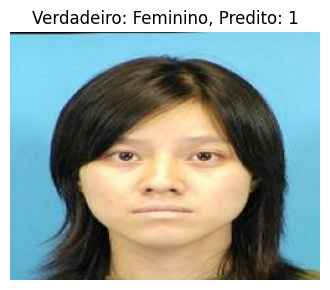

Testando combinação Profunda com diferentes ativações - 2/7...
Treinando o modelo com 1 epochs...
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.4583 - loss: 2.4393 - val_accuracy: 0.1875 - val_loss: 32.4067
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 884ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


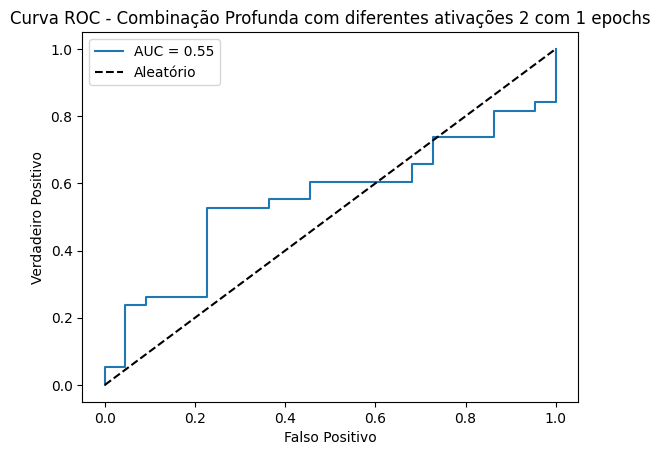

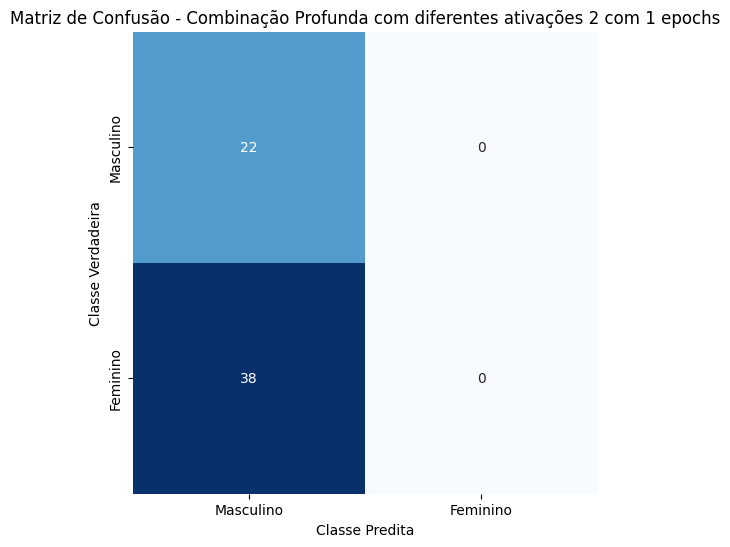

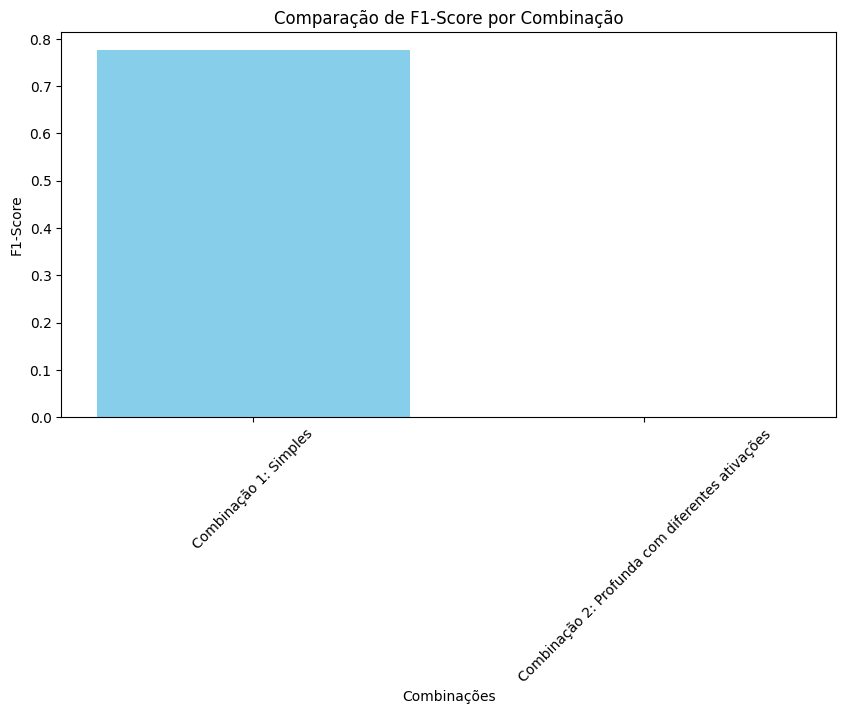

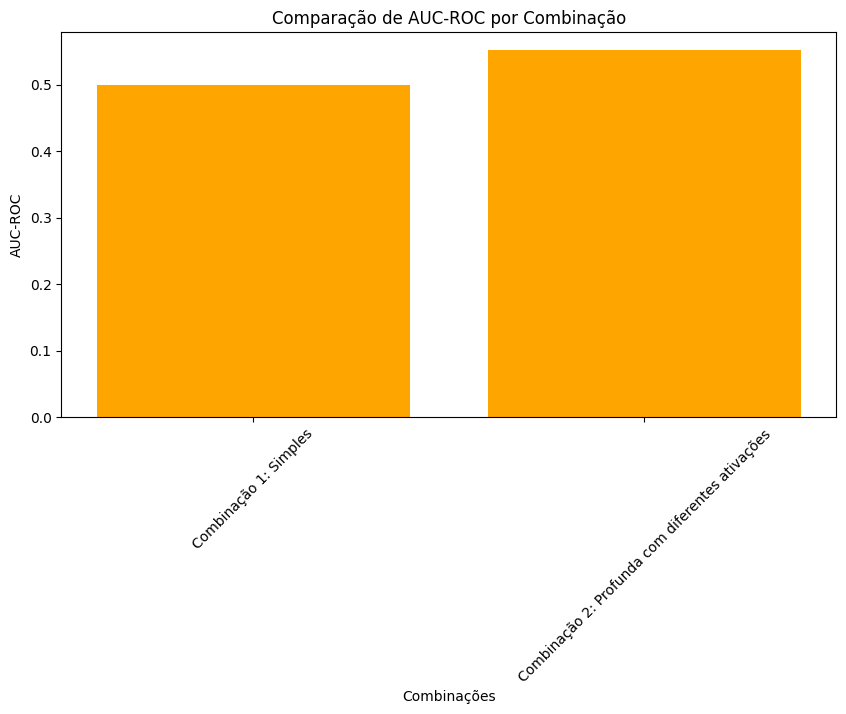

<ipython-input-21-c4681976a010>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Verdadeiro: {classe_verdadeira}, Predito: {int(y_pred[idx])}")


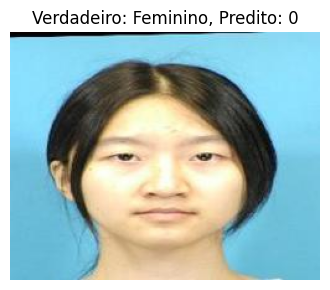

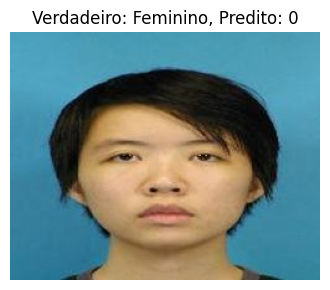

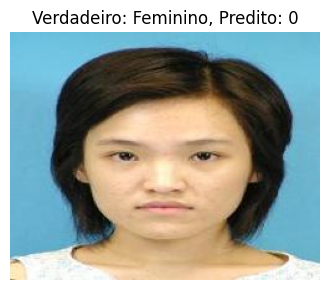

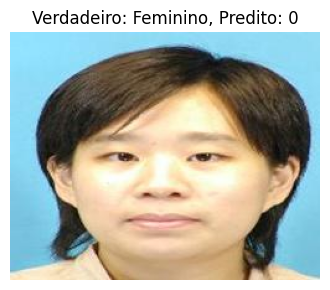

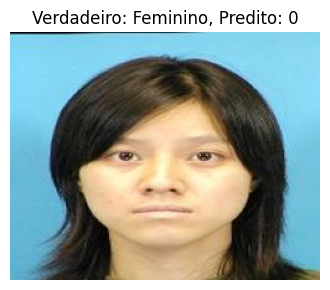

Testando combinação Rede com mais camadas e filtros - 3/7...
Treinando o modelo com 1 epochs...
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.5078 - loss: 0.9768 - val_accuracy: 0.6562 - val_loss: 64.9682
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

In [ ]:
# Rodar e salvar resultados
resultados = testar_combinacoes()
df = pd.DataFrame(resultados)
df.to_csv("resultados_classificacao_masculino_feminino.csv", index=False)
print("Resultados salvos em 'resultados_classificacao_masculino_feminino.csv'")